In [6]:
#Importing important libraries
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [20]:
#Loading The Data 
data_path = "C:/Users/CPT/Downloads/Project No 03/train.tsv"

# Load the dataset
df = pd.read_csv(data_path1, delimiter='\t')
# Inspect the first few rows
df.head()


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [11]:


# Define stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha()]  # Lemmatize and remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply the preprocessing function to the Phrase column
df['cleaned_phrase'] = df['Phrase'].apply(preprocess_text)

# Check the cleaned text
df[['Phrase', 'cleaned_phrase']].head()


,Phrase,cleaned_phrase
0,A series of escapades demonstrating the adage ...,series escapade demonstrating adage good goose...
1,A series of escapades demonstrating the adage ...,series escapade demonstrating adage good goose
2,A series,series
3,A,
4,series,series


In [12]:
import nltk

# Download the 'omw-1.4' resource
nltk.download('omw-1.4')


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\CPT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [13]:
# Define the target variable
y = df['Sentiment']  # Target sentiment labels

# Convert the cleaned phrases to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned_phrase'])  # Numerical feature matrix

# Verify the shape of the matrix
X.shape


(156060, 5000)

In [14]:
# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initialize the model
model = LogisticRegression(max_iter=200)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


C:\Users\CPT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")


Accuracy: 0.61960143534538
Precision: 0.6034722551264341
Recall: 0.61960143534538
F1-Score: 0.5887582455398285
Confusion Matrix:
 [[  275   665   421    53     2]
 [  134  1840  3223   317    13]
 [   40   757 13750  1054    38]
 [    6   183  3244  3025   249]
 [    1    28   341  1104   449]]


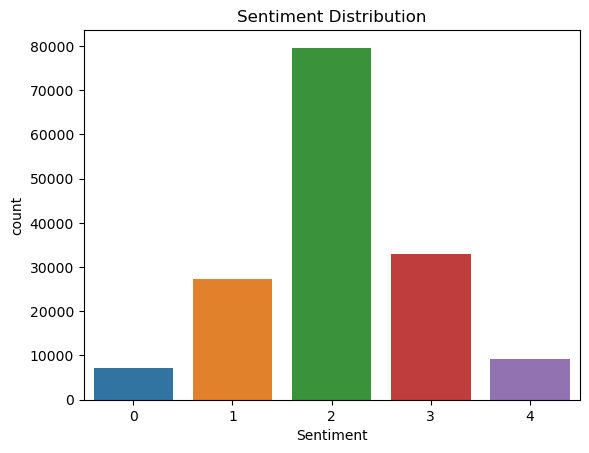

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the sentiment distribution
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()
